<a href="https://colab.research.google.com/github/Ank-kum/Stamatics-project_Markowitz/blob/main/Stamatics_MarkowitzPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader as dr
from datetime import datetime
import matplotlib.pyplot as plt
from random import random

In [ ]:
companies = ['ACC.NS', 'AXISBANK.NS', 'SUNPHARMA.NS']
df1 = pd.read_csv("ACC.NS.csv")
df1 = df1.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis = 1)
df2 = pd.read_csv("AXISBANK.NS.csv")
df2 = df2.drop(['Date','Open', 'High', 'Low', 'Close', 'Volume'], axis = 1)
df3 = pd.read_csv("SUNPHARMA.NS.csv")
df3 = df3.drop(['Date','Open', 'High', 'Low', 'Close', 'Volume'], axis = 1)

In [ ]:
full_df = pd.concat([df1, df2, df3], axis = 1).dropna()
full_df.columns = ('Date', 'Adj Close(ACC)', 'Adj Close(AXISBANK)', 'Adj Close(SUNPHARMA)')
full_df

,Date,Adj Close(ACC),Adj Close(AXISBANK),Adj Close(SUNPHARMA)
0,2020-06-11,1235.192261,413.450012,468.652557
1,2020-06-12,1259.259888,408.000000,475.034515
2,2020-06-15,1241.494507,389.600006,480.674347
3,2020-06-16,1229.932129,381.549988,478.299713
4,2020-06-17,1223.232788,389.600006,480.525970
...,...,...,...,...
247,2021-06-07,2045.949951,751.099976,675.349976
248,2021-06-08,2042.650024,746.349976,678.750000
249,2021-06-09,2004.400024,736.750000,672.849976
250,2021-06-10,2030.300049,744.250000,676.049988


In [ ]:
full_df = full_df.set_index(['Date'])
full_df = np.log(full_df).diff()
full_df.dropna(inplace = True)

In [ ]:
full_df

,Adj Close(ACC),Adj Close(AXISBANK),Adj Close(SUNPHARMA)
Date,,,
2020-06-12,0.019298,-0.013269,0.013526
2020-06-15,-0.014208,-0.046147,0.011803
2020-06-16,-0.009357,-0.020879,-0.004952
2020-06-17,-0.005462,0.020879,0.004644
2020-06-18,0.016775,0.039754,-0.002887
...,...,...,...
2021-06-07,0.017777,0.012122,0.002075
2021-06-08,-0.001614,-0.006344,0.005022
2021-06-09,-0.018903,-0.012946,-0.008730


In [ ]:
mean_return = full_df.mean()
std_dev = full_df.std()
covar_mat = full_df.cov()
cor_mat = full_df.corr()
row, col = full_df.shape

print(mean_return)
print(std_dev)
print(covar_mat)

Adj Close(ACC)          0.001974
Adj Close(AXISBANK)     0.002326
Adj Close(SUNPHARMA)    0.001479
dtype: float64
Adj Close(ACC)          0.017730
Adj Close(AXISBANK)     0.024702
Adj Close(SUNPHARMA)    0.018088
dtype: float64
                      Adj Close(ACC)  Adj Close(AXISBANK)  Adj Close(SUNPHARMA)
Adj Close(ACC)              0.000314             0.000167              0.000099
Adj Close(AXISBANK)         0.000167             0.000610              0.000127
Adj Close(SUNPHARMA)        0.000099             0.000127              0.000327


In [ ]:
portfolios = []
portweights = []
portreturn = []
portstd = []
portsharpe = []
nports = 1000000

for i in range(0, nports):
  w = [random() for i in range(0, len(companies))]
  s = sum(w)
  weights = [i/s for i in w]
  portweights.append(weights)

for j in range(0, nports):
  port_ret = np.dot(portweights[j], mean_return)
  portreturn.append(port_ret)
  variance = np.dot(np.transpose(portweights[j]), np.dot(covar_mat, portweights[j]))
  stdev = np.sqrt(variance)
  portstd.append(stdev)
  sharperatio = port_ret/stdev
  portsharpe.append(sharperatio)

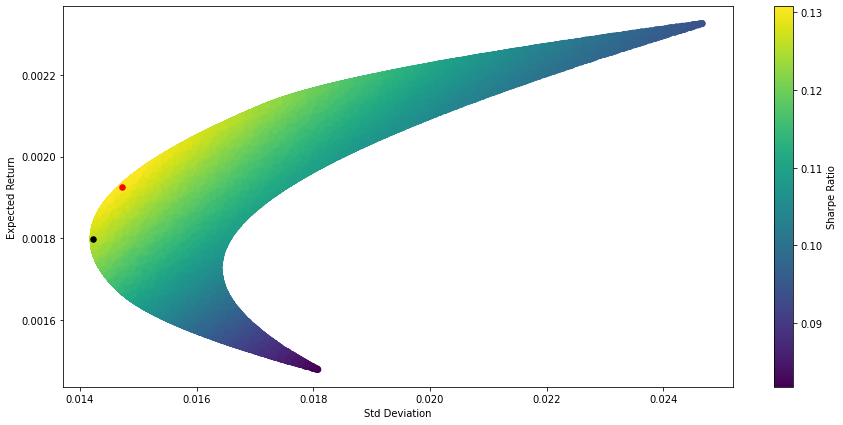

In [ ]:
plt.figure(figsize = (15, 7))
plt.scatter(portstd, portreturn, c = portsharpe, cmap = 'viridis')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Std Deviation')
plt.ylabel('Expected Return')
opt = np.argmax(portsharpe)
line = np.argmin(portstd)
plt.scatter(portstd[opt], portreturn[opt], c = 'red', s = 30)
plt.scatter(portstd[line], portreturn[line], c = 'black', s = 30)
plt.show()

In [ ]:
print('The optimal weights are:')
for i in range(0, len(companies)):
  print('%f : %s' %(portweights[opt][i], companies[i]))

The optimal weights are:
0.496456 : ACC.NS
0.237785 : AXISBANK.NS
0.265759 : SUNPHARMA.NS
